<a href="https://colab.research.google.com/github/chintamaneni11905158/ml/blob/main/INT417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import iplot


In [79]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_spl
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [80]:
data = pd.read_csv("int417.csv")
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [81]:
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [82]:

df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [83]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [84]:
x_train.shape, x_test.shape

((197, 13), (50, 13))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



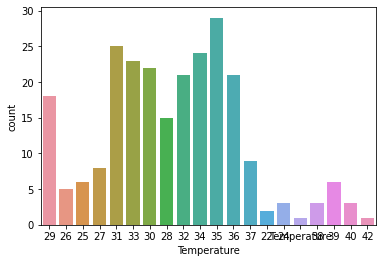

In [85]:
sns.countplot(data["Temperature"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



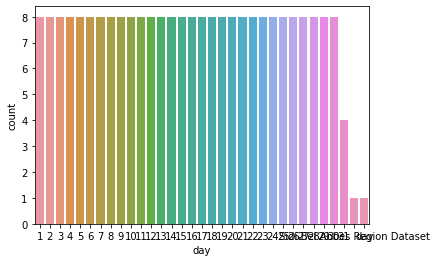

In [86]:
sns.countplot(data["day"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



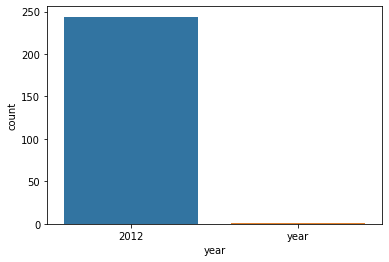

In [87]:
sns.countplot(data["year"])
plt.show()

In [88]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [89]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y , test_size=0.2, random_state=4)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [91]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [92]:
temp_cols = []
for i in data.columns:
  temp_cols.append(i.strip())

data.columns = temp_cols
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [93]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [94]:
list1 = [ 'Temperature' , 'RH' , 'Ws' , 'Rain' , 'FFMC' , 'DMC' , 'DC' , 'ISI' , 'BUI' , 'FWI']

for i in list1:
  data[i] = pd.to_numeric(data[i] , errors = 'coerce')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(10), object(4)
memory usage: 27.1+ KB


In [96]:
data.isna().sum()

day            1
month          2
year           2
Temperature    3
RH             3
Ws             3
Rain           3
FFMC           3
DMC            3
DC             4
ISI            3
BUI            3
FWI            4
Classes        3
dtype: int64

In [97]:
data = data.dropna()

In [98]:
data['year-month'] = data['year']+'-'+data['month']

In [71]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6.0,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6.0,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6.0,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6.0,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [99]:
data['Classes'] = data['Classes'].apply(lambda x: x.strip())

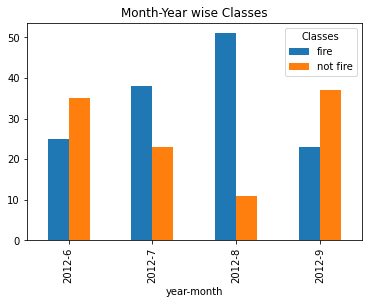

In [100]:
data.groupby(['year-month']).Classes.value_counts().unstack('Classes').plot.bar(title = 'Month-Year wise Classes')
plt.show()

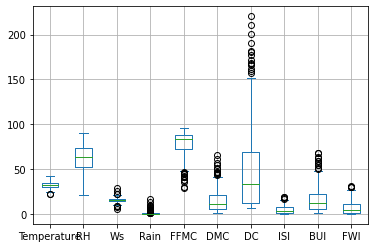

In [101]:
data.plot.box(grid = 'True')

In [102]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'year-month'],
      dtype='object')

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['Temperature' , 'RH' , 'Ws' , 'Rain' , 'FFMC' , 'DMC' , 'DC' , 'ISI' , 'BUI' , 'FWI']]
X['intercept'] = 1

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,vif
0,Temperature,2.313263
1,RH,2.745650
2,Ws,1.292609
3,Rain,1.540571
4,FFMC,4.101944
5,DMC,76.320872
6,DC,24.618051
7,ISI,22.836345
8,BUI,170.776369
9,FWI,40.392365


In [104]:
X = data[['Temperature' , 'RH' , 'Ws' , 'Rain' , 'FFMC' , 'DMC' , 'DC' , 'ISI']]
X['intercept'] = 1

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,vif
0,Temperature,2.310264
1,RH,2.708854
2,Ws,1.291926
3,Rain,1.533312
4,FFMC,3.644464
5,DMC,6.590911
6,DC,5.094637
7,ISI,3.809801
8,intercept,393.777961


In [105]:
X = data[['Temperature' , 'RH' , 'Ws' , 'Rain' , 'FFMC' , 'DMC' , 'DC' , 'ISI']]
y = data['Classes']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [107]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
y_predictions = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [108]:
from sklearn.metrics import classification_report

print (classification_report(y_test , y_predictions))

              precision    recall  f1-score   support

        fire       0.93      1.00      0.96        27
    not fire       1.00      0.91      0.95        22

    accuracy                           0.96        49
   macro avg       0.97      0.95      0.96        49
weighted avg       0.96      0.96      0.96        49



In [109]:
random_grid = {'n_estimators' : [200 , 500 , 800],
               'max_features' : ['auto' , 'sqrt'],
               'max_depth' : [5 , 8]
               }

print (random_grid)

{'n_estimators': [200, 500, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 8]}


In [110]:
rf = RandomForestClassifier(random_state = 42)

rfc = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose = -2, n_jobs = -1)

rfc. fit (X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 500, 800]},
                   verbose=-2)

In [111]:
accuracy_score(y_test, rfc.predict (X_test))*100


100.0

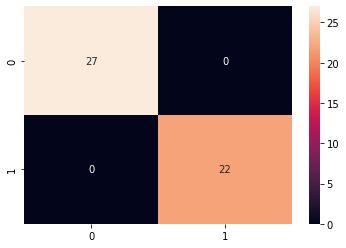

In [112]:
confusion_matrix = confusion_matrix(y_test, rfc.predict(X_test))

sns.heatmap(confusion_matrix, annot = True)

In [113]:
print(classification_report (y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

        fire       1.00      1.00      1.00        27
    not fire       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

